<a href="https://colab.research.google.com/github/mnijhuis-dnb/Artificial_Intelligence_and_Machine_Learning_for_SupTech/blob/main/Tutorials/Tutorial%203%20Data%20pre-processing%20and%20assessing%20model%20performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial Intelligence and Machine Learning for SupTech  
Tutorial 3: Data pre-processing and assessing model performance

*	How to pre-process: standardize your data
*	Pros and cons of standardization
*	Working with the confusion matrix
  *	What if costs are not symmetric?
  *	The trade-off between precision and recall


<br/>

14 March 2023  

**Instructors**  
Prof. Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dr. Michiel Nijhuis (m.nijhuis@dnb.nl)  

### Previous Tutorials
In this section we re-run some of the code from the first 2 tutorials to have a starting model. With these steps out of the way we can focus on the pre-processing and the further evauluating of the model.

In [2]:
!gdown 1-3c9BhPfl6D92HvTI4kNd0MfmTquiUwQ
!gdown 1-5ZzK3EAqc-i3AgnLOSZXTGGZsEPEmzH

Downloading...
From: https://drive.google.com/uc?id=1-3c9BhPfl6D92HvTI4kNd0MfmTquiUwQ
To: /content/application_record.csv
100% 54.3M/54.3M [00:00<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5ZzK3EAqc-i3AgnLOSZXTGGZsEPEmzH
To: /content/credit_record.csv
100% 15.4M/15.4M [00:00<00:00, 207MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = 'credit_record.csv'
df_record = pd.read_csv(path)

In [5]:
path = 'application_record.csv'
df_applications = pd.read_csv(path)

In [6]:
df_record.loc[:,'status'] = df_record.loc[:,'STATUS']
df_record.loc[:,'status'] = df_record.loc[:,'status'].replace('X', '0')
df_record.loc[:,'status'] = df_record.loc[:,'status'].replace('C', '0')

In [7]:
df_record.loc[:,'status'] = pd.to_numeric(df_record.loc[:,'status'])

In [8]:
sr_defaults = df_record.groupby('ID')['status'].agg(lambda x: sum(x>=2)>0)

In [9]:
df_applications = df_applications.drop_duplicates(subset='ID')

In [10]:
df_applications = df_applications.set_index('ID')

In [11]:
df_applications = df_applications.dropna()

In [12]:
obj_cols = df_applications.select_dtypes(include=['object']).columns.tolist()
dummies_list = [pd.get_dummies(df_applications[col], prefix=col, drop_first=True) for col in obj_cols]
df_applications = pd.concat([df_applications.drop(columns=obj_cols)] + dummies_list, axis=1)

In [13]:
df_data = df_applications.merge(sr_defaults, how='inner', left_index=True, right_on='ID')

In [14]:
df_data= df_data.rename(columns={'status':'DEFAULTED'}).dropna()

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(C=1.0, 
          kernel='rbf', 
          degree=3, 
          gamma='scale', 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.1, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=5, 
          decision_function_shape='ovr', 
          break_ties=False, 
          random_state=43)

In [17]:
X = df_data.drop(columns='DEFAULTED')
y = df_data['DEFAULTED']

In [18]:
clf = clf.fit(X.iloc[:10000], y.iloc[:10000])

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [19]:
y_model = clf.predict(X)

### Tutorial 3

Evaluate the preformance based on the confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y, y_model)

array([[15201,  9511],
       [  244,   178]])

Let's make a precision recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_scores = clf.predict_proba(X)
precision_recall_curve(y, y_scores)

Can you move the decision boundary to have a specific precision and recall?

Let's have a look at the distribution of one of the variables

<AxesSubplot:ylabel='Frequency'>

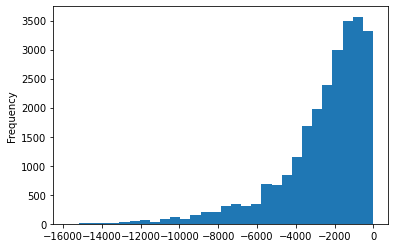

In [22]:
df_data['DAYS_EMPLOYED'].plot.hist(bins=30)

As you can see the distribution of the data is not that ideal for most machine learning algorithms. Can you improve the prediction of the DEFAULT rate, by adjusting the parameters?

Another point with the DAYS_EMPLOYED varaible is that it's range is between -16000 and 0, this is much higher than most other variables, can you scale this and other variables to a better range?